kmp 2022

Based on 

**Ben Lauwens & Allen Downey "Think Julia: How to Think Like a Computer Scientist" 

https://benlauwens.github.io/ThinkJulia.jl/latest/book.html**

Resources:

Julia webpage https://julialang.org/ 

Julia documentation https://docs.julialang.org/en/v1/


## Chapter 19 -- Syntax Goodies

https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap19

Julia provides a number of features that are not really necessary—you can write good code without them—but with them you can sometimes write code that is more concise, readable or efficient, and sometimes all three. This chapter and the next discuss some of the things left out in the previous chapters:

- syntax supplements

- functions, types and macros directly available in Base

- functions, types and macros in the Standard Library



### Named Tuples

You can name the components of a tuple, creating a **named tuple**:
```Julia
    julia> x = (a=1, b=1+1)
        (a = 1, b = 2)

    julia> x.a
        1
```
With named tuples, **fields** can be accessed by name using **dot syntax `x.a`** .


### Functions

Function in Julia can be defined by a compact syntax or **short-form**.

```Julia
    julia> f(x,y) = x + y
        f (generic function with 1 method)
```
### Anonymous Functions

We can define a function without specifying a name:
```Julia
    julia> x -> x^2 + 2x - 1
    #1 (generic function with 1 method)
    
    julia> function (x)
            x^2 + 2x - 1
        end
    #3 (generic function with 1 method)
```


These are example of anonymous functions. Anonymous functions are often used as an argument to another function:

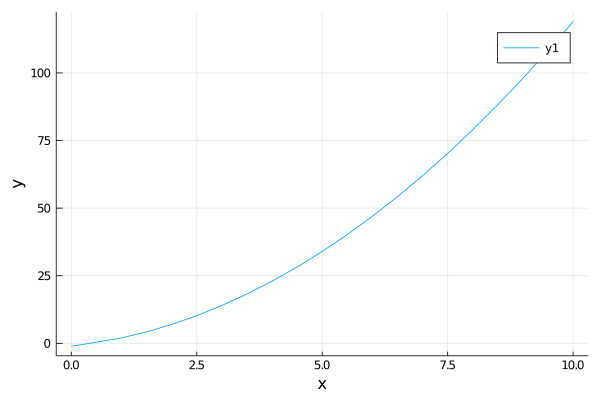

In [5]:
using Plots

plot(x -> x^2 + 2x - 1, 0, 10, xlabel="x", ylabel="y")

https://docs.juliaplots.org/stable/

### Keyword Arguments

**Function arguments can also be named**:

```Julia
    julia> function myplot(x, y; style="solid", width=1, color="black")
            ###
        end
    myplot (generic function with 1 method)

    julia> myplot(0:10, 0:10, style="dotted", color="blue")
```

**Keyword arguments** in a function are **specified after a semicolon** in the signature but can be called with a comma.

### Closures

A **closure** is a technique allowing a function to capture a variable defined outside the calling scope of the function.

```Julia
    julia> foo(x) = ()->x
        foo (generic function with 1 method)

    julia> bar = foo(1)
        #1 (generic function with 1 method)

    julia> bar()
        1
```
In this example, the function `foo` returns an anonymous function that has access to the x argument of the function foo. `bar` points to the anonymous function and returns the value of the argument of foo.


### Blocks

A **block** is a way to group a number of statements. A block starts with the keyword **begin** and ends with **end**.

In Case Study: Interface Design the `@svg` macro was introduced:

```Julia
    🐢 = Turtle()
        @svg begin
            forward(🐢, 100)
            turn(🐢, -90)
            forward(🐢, 100)
        end
```
In this example, the macro @svg has a single argument, i.e., a block grouping 3 function calls.

### let Blocks

A **let block** is useful to create new bindings, i.e., locations that can refer to values.

```Julia
    julia> x, y, z = -1, -1, -1;

    julia> let x = 1, z
            @show x y z;
        end
        x = 1
        y = -1
        ERROR: UndefVarError: z not defined

    julia> @show x y z;
        x = -1
        y = -1
        z = -1
```

In the example, the first @show macro, shows the local x, the global y and the undefined local z. The global variables are untouched.

### do Blocks

In Reading and Writing we had to close the file after when where done writing. This can be done automatically using a do block:

```Julia
    julia> data = "This here's the wattle,\nthe emblem of our land.\n"
        "This here's the wattle,\nthe emblem of our land.\n"

    julia> open("output.txt", "w") do fout
            write(fout, data)
        end
        48
```
In this example fout is the file stream used for output. This is functionally equivalent to

```Julia
    julia> f = fout -> begin
            write(fout, data)
        end
    #3 (generic function with 1 method)

    julia> open(f, "output.txt", "w")
48
```
The anonymous function is used as the first argument of the function open:

```Julia
    function open(f::Function, args...)
        io = open(args...)
        try
            f(io)
        finally
            close(io)
        end
    end
```
A do block can “capture” variables from its enclosing scope. For example, the variable data in the above example of open ... do is captured from the outer scope.


### Control Flow

### Ternary Operator

The ternary operator, **?:**, is an alternative to an if-elseif statement used when you need to make a choice between single expression values.

```Julia
    julia> a = 150
        150

    julia> a % 2 == 0 ? println("even") : println("odd")
        even
```
The expression before the `?` is a condition expression. If the condition is true, the expression before the `:` is evaluated, otherwise, the expression after the `:` is evaluated.


### Short-Circuit Evaluation

The operators `&&` and `||` do a **short-circuit evaluation**: a next argument is only evaluated when it is needed to determine the final value.

For example, a recursive factorial routine could be defined like this:

```Julia
    function fact(n::Integer)
        n >= 0 || error("n must be non-negative")
        n == 0 && return 1
        n * fact(n-1)
    end
```


### Tasks (aka Co-routines)

A **task** is a control structure that **can pass cooperatively control without returning**. In Julia, a task can be implemented as a function having as first argument a **Channel object**. A channel is used to pass values from the function to the callee.

The Fibonnaci sequence can be generated using a task:

```Julia
    function fib(c::Channel)
        a = 0
        b = 1
        put!(c, a)
        while true
            put!(c, b)
            (a, b) = (b, a+b)
        end
    end
```

`put!` stores values in a channel object and `take!` reads values from it:

```Julia
    julia> fib_gen = Channel(fib);

    julia> take!(fib_gen)
        0
    julia> take!(fib_gen)
        1
    julia> take!(fib_gen)
        1
    julia> take!(fib_gen)
        2
    julia> take!(fib_gen)
        3
```
The **constructor Channel** creates the task. The function fib is suspended after each call to put! and resumed after take!. For performance reasons, several values of the sequence are buffered in the channel object during a **resume/suspend cycle**.

A channel object can also be used as an iterator:

```Julia
    julia> for val in Channel(fib)
            print(val, " ")
            val > 20 && break
        end
        0 1 1 2 3 5 8 13 21
```


### Types

### Primitive Types

A **concrete type** consisting of plain old bits is called a **primitive type**. Unlike most languages, **with Julia you can declare your own primitive types**. 

The standard primitive types are defined in the same way:

```Julia
    primitive type Float64 <: AbstractFloat 64 end
    primitive type Bool <: Integer 8 end
    primitive type Char <: AbstractChar 32 end
    primitive type Int64 <: Signed 64 end
```

The number in the statements specifies how many bits are required. The following example creates a primitive type Byte and a constructor:

```Julia
    julia> primitive type Byte 8 end

    julia> Byte(val::UInt8) = reinterpret(Byte, val)
        Byte

    julia> b = Byte(0x01)
        Byte(0x01)
```
The function **reinterpret** is used to store the bits of an unsigned integer with 8 bits (UInt8) into the byte.


### Parametric Types

Julia’s type system is parametric, meaning that types can have parameters. **Type parameters** are introduced after the name of the type, surrounded by curly braces:

```Julia
    struct Point{T<:Real}
        x::T
        y::T
    end
```

This defines a new parametric type, Point{T<:Real}, holding two "coordinates" of type T, which can be any type having Real as supertype.

```Julia
    julia> Point(0.0, 0.0)
        Point{Float64}(0.0, 0.0)
```

In addition to composite types, abstract types and primitive types can also have a type parameter.

Having concrete types for struct fields is absolutely recommended for performance reasons, so this is a good way to make Point both fast and flexible.


### Type Unions

A **type union** is an abstract parametric type that can act as any of its argument types:
```Julia
    julia> IntOrString = Union{Int64, String}
        Union{Int64, String}

    julia> 150 :: IntOrString
        150

    julia> "Julia" :: IntOrString
        "Julia"
```
A type union is in most computer language an internal construct for reasoning about types. Julia however exposes this feature to its users because efficient code can be generated when the type union has a small number of types. 

This feature gives the Julia programmer a tremendous flexibility for controlling dispatch.


### Methods

### Parametric Methods

**Method definitions** can also have type parameters qualifying their signature:

```Julia
    julia> isintpoint(p::Point{T}) where {T} = (T === Int64)
        isintpoint (generic function with 1 method)

    julia> p = Point(1, 2)
        Point{Int64}(1, 2)

    julia> isintpoint(p)
        true
```

### Function-like Objects

Any arbitrary Julia object can be made **callable**. Such `callable objects` are sometimes called **functors**.

```Julia
    struct Polynomial{R}
        coeff::Vector{R}
    end

    function (p::Polynomial)(x)
        val = p.coeff[end]
        for coeff in p.coeff[end-1:-1:1]
            val = val * x + coeff
        end
        val
    end
```
To evaluate the polynomial, we simply have to call it:

```Julia
    julia> p = Polynomial([1,10,100])
        Polynomial{Int64}([1, 10, 100])

    julia> p(3)
        931
```


### Constructors

Parametric types can be explicitly or implicitly constructed:

```Julia
    julia> Point(1,2)         # implicit T
        Point{Int64}(1, 2)
    
    julia> Point{Int64}(1, 2) # explicit T
        Point{Int64}(1, 2)
    
    julia> Point(1,2.5)       # implicit T
        ERROR: MethodError: no method matching Point(::Int64, ::Float64)
```
**Default inner and outer constructors are generated for each T:**

```Julia
    struct Point{T<:Real}
        x::T
        y::T
        Point{T}(x,y) where {T<:Real} = new(x,y)
    end

    Point(x::T, y::T) where {T<:Real} = Point{T}(x,y)
```
and both x and y have to be of the same type. When x and y have a different type, the following outer constructor can be defined:

```Julia
    Point(x::Real, y::Real) = Point(promote(x,y)...);
```
The promote function is detailed in Promotion.

### Conversion and Promotion

Julia has a system for promoting arguments to a common type. This is not done automatically but can be easily extended.

### Conversion

A value can be converted from one type to another:

```Julia
    julia> x = 12
        12
    
    julia> typeof(x)
        Int64
    
    julia> convert(UInt8, x)
        0x0c
    
    julia> typeof(ans)
        UInt8
```
We can add our own **convert** methods:

```Julia
    julia> Base.convert(::Type{Point{T}}, x::Array{T, 1}) where {T<:Real} = Point(x...)

    julia> convert(Point{Int64}, [1, 2])
     Point{Int64}(1, 2)
```

### Promotion

**Promotion** is the conversion of values of mixed types to a single common type:

```Julia
    julia> promote(1, 2.5, 3)
        (1.0, 2.5, 3.0)
```
Methods for the **promote function** are normally not directly defined, but the auxiliary function **promote_rule** is used to specify the rules for promotion:

```Julia
    promote_rule(::Type{Float64}, ::Type{Int32}) = Float64
```


### Metaprogramming

**Julia code can be represented as a data structure of the language itself. This allows a program to transform and generate its own code.**

### Expressions

Every Julia program starts as a string:

```Julia
  julia> prog = "1 + 2"
    "1 + 2"
```
The next step is to parse each string into an object called an **expression**, represented by the Julia type Expr:

```Julia
  julia> ex = Meta.parse(prog)
    :(1 + 2)

  julia> typeof(ex)
    Expr

  julia> dump(ex)
    Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2
```
The **dump** function displays expr objects with annotations.

Expressions can be constructed directly by prefixing with **`:`** inside parentheses or using a quote block

```Julia
julia> ex = quote
           1 + 2
       end;
```

### eval

Julia can evaluate an expression object using **eval**:

```Julia
  julia> eval(ex)
    3
```
Every module has its own eval function that evaluates expressions in its scope.

Warning: When you are using a lot of calls to the function eval, often this means that something is wrong. eval is considered “evil”.


### Macros

Macros can include generated code in a program. A **macro** maps a tuple of Expr objects directly to a compiled expression. Here is a simple macro:

```Julia
    macro containervariable(container, element)
        return esc(:($(Symbol(container,element)) = $container[$element]))
    end
```

Macros are called by prefixing their name with the `@` (at-sign). The macro call @containervariable letters 1 is replaced by:

```Julia
    :(letters1 = letters[1])
```
**@macroexpand** @containervariable letters 1 returns this expression which is extremely useful for debugging.

This example illustrates how **a macro can access the name of its arguments**, something a function cannot do. The return expression needs to be **escaped** with **esc** because it has to be resolved in the macro call environment.

Why macros? Macros generate and include fragments of customized code during parse time, thus before the full program is run.

### Generated Functions

The macro **@generated** creates specialized code for methods depending on the types of the arguments:

```Julia
    @generated function square(x)
        println(x)
        :(x * x)
    end
```
The body returns a quoted expression like a macro. For the caller, the generated function behaves as a regular function:

```Julia
    julia> x = square(2); # note: output is from println() statement in the body
        Int64
    
    julia> x              # now we print x
        4
    
    julia> y = square("spam");
        String
    
    julia> y
        "spamspam"
```



### Missing Values

Missing values can be represented via the **missing object**, which is the singleton instance of the type **Missing**.

Arrays can contain missing values:

```Julia
    julia> a = [1, missing]
        2-element Array{Union{Missing, Int64},1}:
        1
        missing
```
The element type of such an array is **Union{Missing, T}**, with T the type of the non-missing values.

Reduction functions return missing when called on arrays which contain missing values

```Julia
    julia> sum(a)
        missing
```

In this situation, use the **skipmissing** function to skip missing values:

```Julia
    julia> sum(skipmissing([1, missing]))
    1
```


### Calling C and Fortran Code

A lot of code is written in C or Fortran. Reusing tested code is often better than writing your own version of an algorithm. Julia can call directly existing C or Fortran libraries using the **ccall syntax**.

In Databases we introduced a Julia interface to the GDBM library of database functions. The library is written in C. To close the database a function call to close(db) has to be made:

```Julia
    Base.close(dbm::DBM) = gdbm_close(dbm.handle)

    function gdbm_close(handle::Ptr{Cvoid})
        ccall((:gdbm_close, "libgdbm"), Cvoid, (Ptr{Cvoid},), handle)
    end
```
A dbm object has a field handle of **Ptr{Cvoid} type**. This field holds a **C pointer** that refers to the database. To close the database the C function gdbm_close has to be called having as only argument the C pointer pointing to the database and no return value. Julia does this directly with the ccall function having as arguments:

- a tuple consisting of a symbol holding the name of the function we want to call: :gdbm_close and the shared library specified as a string: "libgdm",

- the return type: Cvoid,

- a tuple of argument types: (Ptr{Cvoid},) and

- the argument values: handle.

The complete mapping of the GDBM library can be found as an example in the ThinkJulia sources.
